In [1]:
from PIL import Image
import numpy as np
from PIL import ImageChops, ImageOps
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

# Filtrowanie przez wyrównanie histogramu

In [2]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

RGB


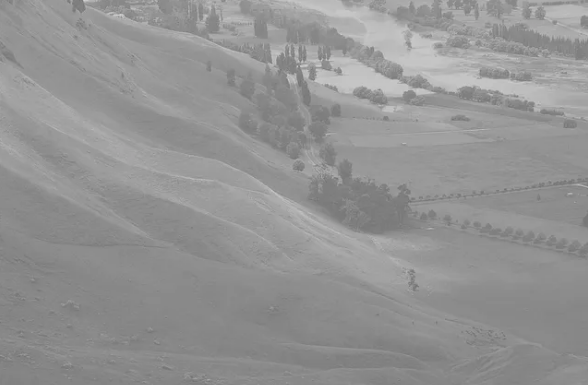

In [3]:
widok = Image.open('widok.png')
print(widok.mode)
widok

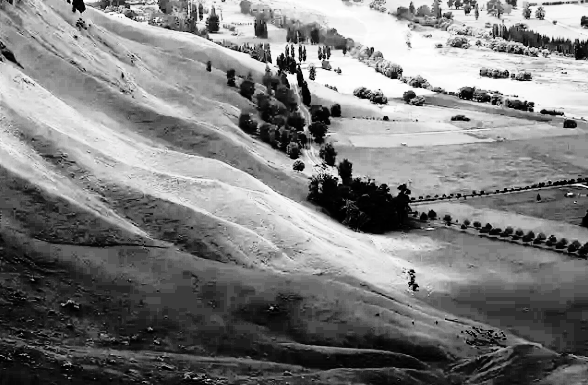

In [4]:
widok_equalized = ImageOps.equalize(widok, mask = None)
widok_equalized

In [5]:
im = Image.open('brain.png')
print(im.mode)
print(im.size)
statystyki(im)

RGBA
(352, 326)
extrema  [(0, 255), (0, 255), (0, 255), (255, 255)]
count  [114752, 114752, 114752, 114752]
mean  [64.40476854433909, 64.40476854433909, 64.40476854433909, 255.0]
median  [68, 68, 68, 255]
stddev  [45.56588189784377, 45.56588189784377, 45.56588189784377, 0.0]


In [6]:
szary = im.convert('L')
print(szary.mode)
print(szary.size)
statystyki(szary)

L
(352, 326)
extrema  [(0, 255)]
count  [114752]
mean  [64.40476854433909]
median  [68]
stddev  [45.56588189784377]


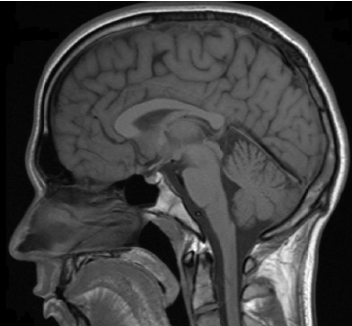

In [7]:
szary

<BarContainer object of 256 artists>

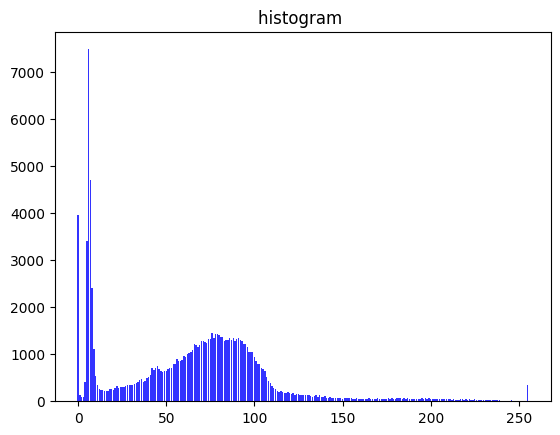

In [8]:
hist = szary.histogram()
plt.title("histogram ")
plt.bar(range(256), hist[:], color='b', alpha=0.8)

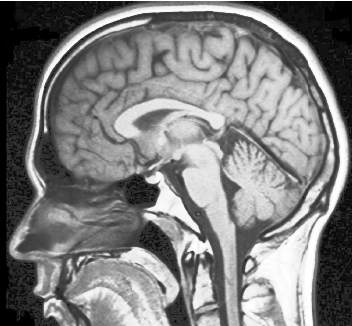

In [9]:
im_equalized1 = ImageOps.equalize(szary, mask=None)
im_equalized1

<BarContainer object of 256 artists>

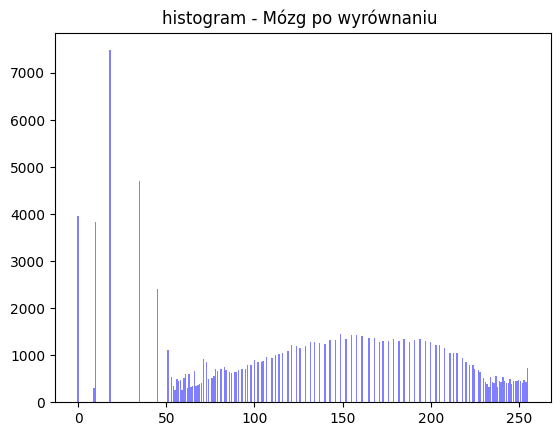

In [10]:
hist = im_equalized1.histogram()
plt.title("histogram - Mózg po wyrównaniu ")
plt.bar(range(256), hist[:], color='b', alpha=0.5)

## Wyrównanie obrazu w trybie RGB

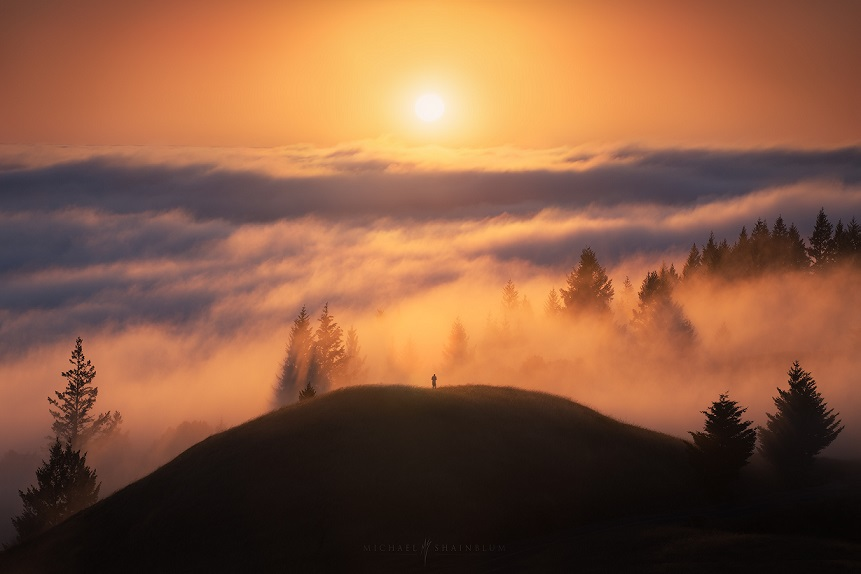

In [11]:
im = Image.open('mgla.jpg') # obraz kolorowy

im


extrema  [(5, 255), (0, 244), (0, 240)]
count  [494214, 494214, 494214]
mean  [136.95908452613645, 90.40623495085126, 63.51917388014099]
median  [149, 91, 73]
stddev  [83.18721585413134, 56.8894532947344, 35.732913863973245]


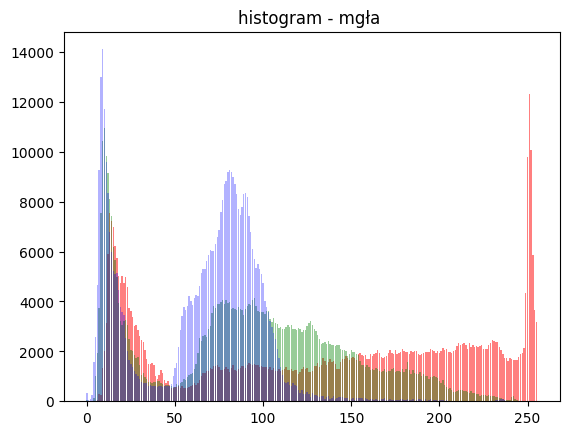

In [12]:
statystyki(im)
hist = im.histogram()
plt.title("histogram - mgła ")
plt.bar(range(256), hist[:256], color='r', alpha=0.5)
plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
plt.show()

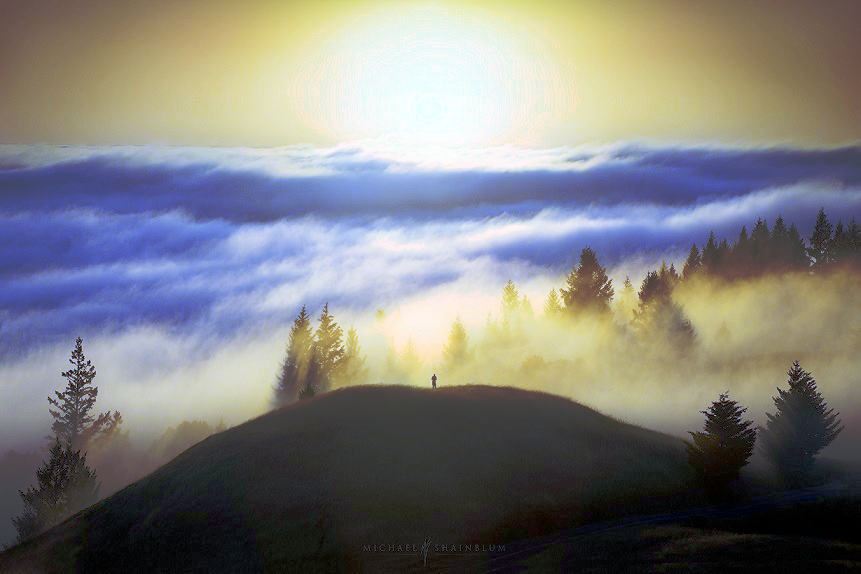

In [13]:
r, g, b = im.split()
# wyrównanie każdego kanału oddzielnie
r_eq = ImageOps.equalize(r)
g_eq = ImageOps.equalize(g)
b_eq = ImageOps.equalize(b)
im1 = Image.merge('RGB', (r_eq, g_eq, b_eq))
im1

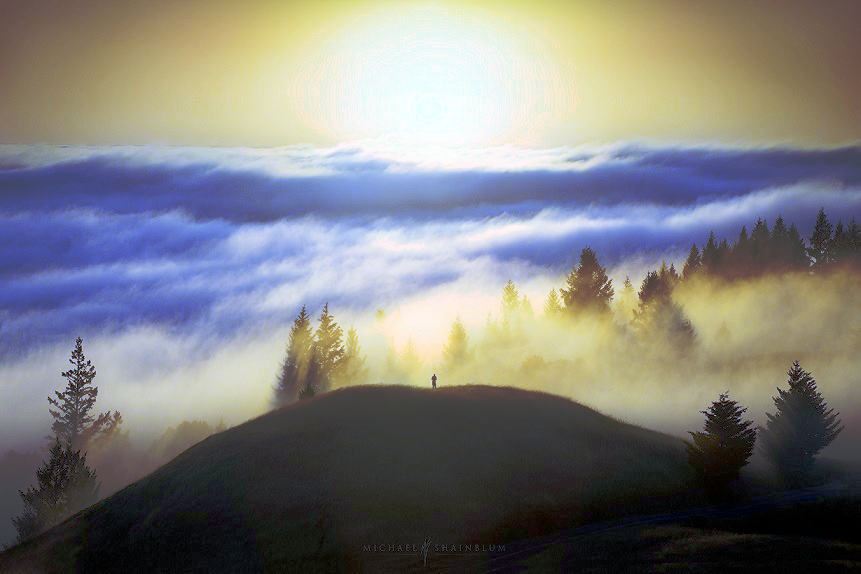

In [14]:
# wyrównaie obrazu RGB
im_equalized1 = ImageOps.equalize(im, mask=None)
im_equalized1

extrema  [(0, 255), (0, 255), (0, 255)]
count  [494214, 494214, 494214]
mean  [127.56359390871161, 126.69678115148498, 125.91618205878426]
median  [128, 126, 125]
stddev  [74.04443163783701, 74.05644815560801, 73.78911379717243]


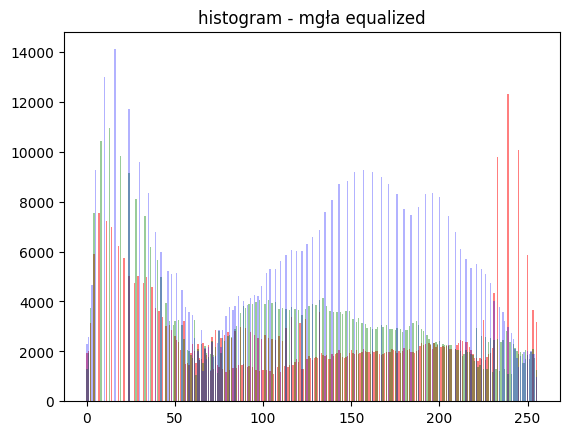

In [15]:
statystyki(im_equalized1)
hist = im_equalized1.histogram()
plt.title("histogram - mgła equalized")
plt.bar(range(256), hist[:256], color='r', alpha=0.5)
plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
plt.show()

In [16]:
diff=ImageChops.difference(im_equalized1, im1)
statystyki(diff)

extrema  [(0, 0), (0, 0), (0, 0)]
count  [494214, 494214, 494214]
mean  [0.0, 0.0, 0.0]
median  [0, 0, 0]
stddev  [0.0, 0.0, 0.0]
